# Project: Sales Data Analysis
##### Unified Mentor Internship Project

In [14]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import os

In [15]:
# Load Dataset

dataset= pd.read_csv("/content/Sales Data.csv")
dataset


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


To analyze sales data using a dataset, we can perform several key steps, including data cleaning, data exploration, and visualization. I'll assume the dataset contains columns such as 'Order ID,' 'Product,' 'Quantity Ordered,' 'Price Each,' 'Order Date,' 'Purchase Address,' etc.

## Data Preparation
#### Inspect the Data
#### check the structure and content of the data before proceeding

In [16]:
# Check the first few rows
dataset.head()

# Summary of data types and missing values
dataset.info()

# Statistical summary
dataset.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


#### Handle Missing Data:
#### Check for missing values and decide how to handle them (e.g., remove or fill in with an appropriate value).

In [17]:
# Now let's Check for missing values in the dataset
dataset.isna().sum()


,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


In [20]:
# Drop rows with missing values

dataset.dropna(inplace=True)

In [18]:
# Again check if missing values are removed or not

dataset.isna().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0
Month,0
Sales,0
City,0


#### Remove Duplicates:
#### NOw lets Check for duplicate rows and remove them if it is present.

In [19]:
# Remove any rows where 'Order Date' is not a valid date or contains invalid data
dataset = dataset[dataset['Order Date'].str[0:2] != 'Or']

In [21]:
# Convert 'Order Date' to string to apply the string operation
dataset = dataset[dataset['Order Date'].astype(str).str[0:2] != 'Or']

# Continue with the rest of your code
# Convert columns to correct data types
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'], errors='coerce')
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'], errors='coerce')
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], errors='coerce')


In [22]:

# Add new useful columns
# Extract 'Month' from 'Order Date'
dataset['Month'] = dataset['Order Date'].dt.month

# Add a 'Sales' column (Quantity Ordered * Price Each)
dataset['Sales'] = dataset['Quantity Ordered'] * dataset['Price Each']

# Extract 'Hour' from 'Order Date' for time analysis
dataset['Hour'] = dataset['Order Date'].dt.hour

# Extract 'City' from 'Purchase Address'
dataset['City'] = dataset['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")

# Exploratory Data Analysis (EDA) continues...


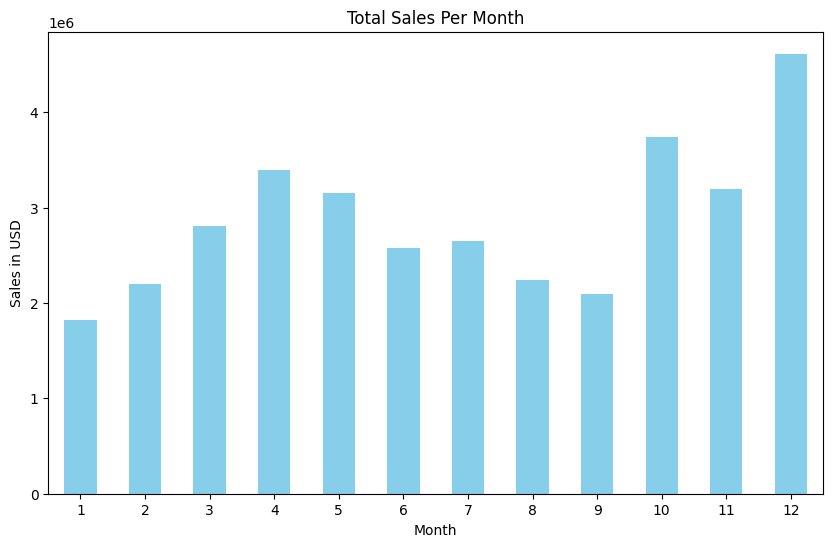

In [25]:
# Exploratory Data Analysis (EDA)
# Ensure 'Month' column exists by extracting from 'Order Date'
dataset['Month'] = dataset['Order Date'].dt.month

# 1. What month had the highest sales?
# Group by 'Month' and sum the 'Sales' column
monthly_sales = dataset.groupby('Month')['Sales'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

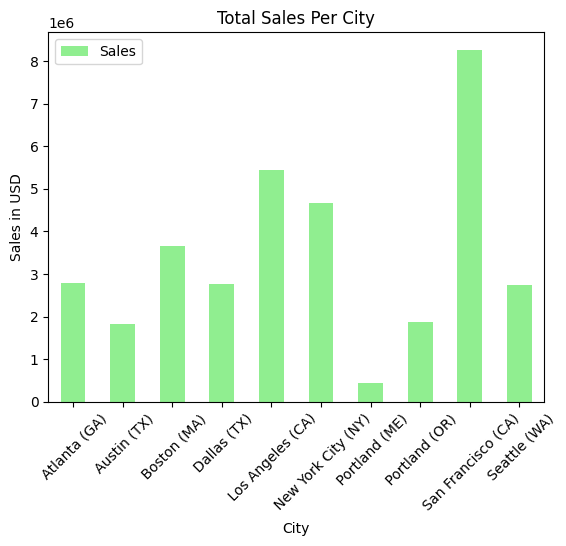

In [26]:
# 2. What city had the highest number of sales?
# Use only numeric columns for the sum operation
city_sales = dataset.groupby('City').agg({'Sales': 'sum'})  # Specify only the 'Sales' column

plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales Per City')
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.xticks(rotation=45)
plt.show()

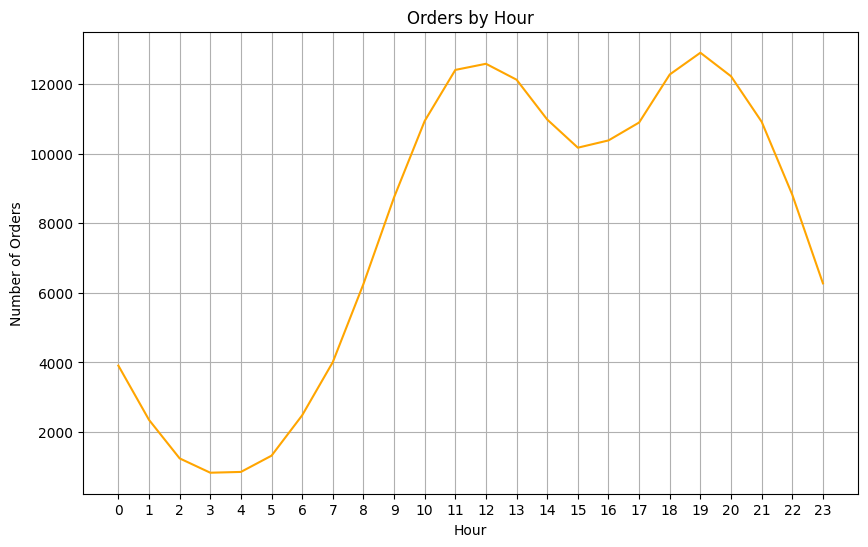

In [27]:
# 3. What time should we display advertisements to maximize the likelihood of customer purchases?
hours = [hour for hour, df_hour in dataset.groupby('Hour')]

plt.figure(figsize=(10, 6))
plt.plot(hours, dataset.groupby('Hour').count()['Order ID'], color='orange')
plt.title('Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(hours)
plt.show()

In [29]:
# 4. What products are most often sold together?
# Create a new DataFrame for duplicated Order IDs (orders with multiple products)
df_duplicated = dataset[dataset['Order ID'].duplicated(keep=False)]

# Use .loc to avoid SettingWithCopyWarning
df_duplicated.loc[:, 'Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates to keep one row per order
df_duplicated = df_duplicated[['Order ID', 'Grouped']].drop_duplicates()

# Count the most common combinations of products sold together
from collections import Counter
from itertools import combinations  # Import the 'combinations' function

count = Counter()

# Count combinations of products sold together
for row in df_duplicated['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Display the most common pairs of products sold together
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


<ipython-input-29-997259f0d720>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated.loc[:, 'Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


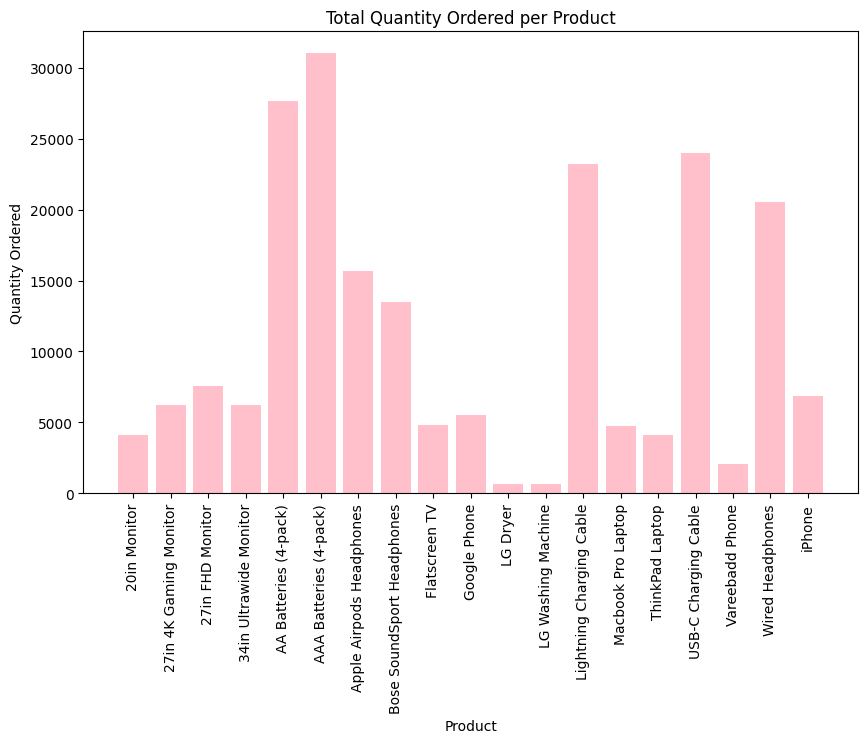

<ipython-input-31-c7c196657b75>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation=90)


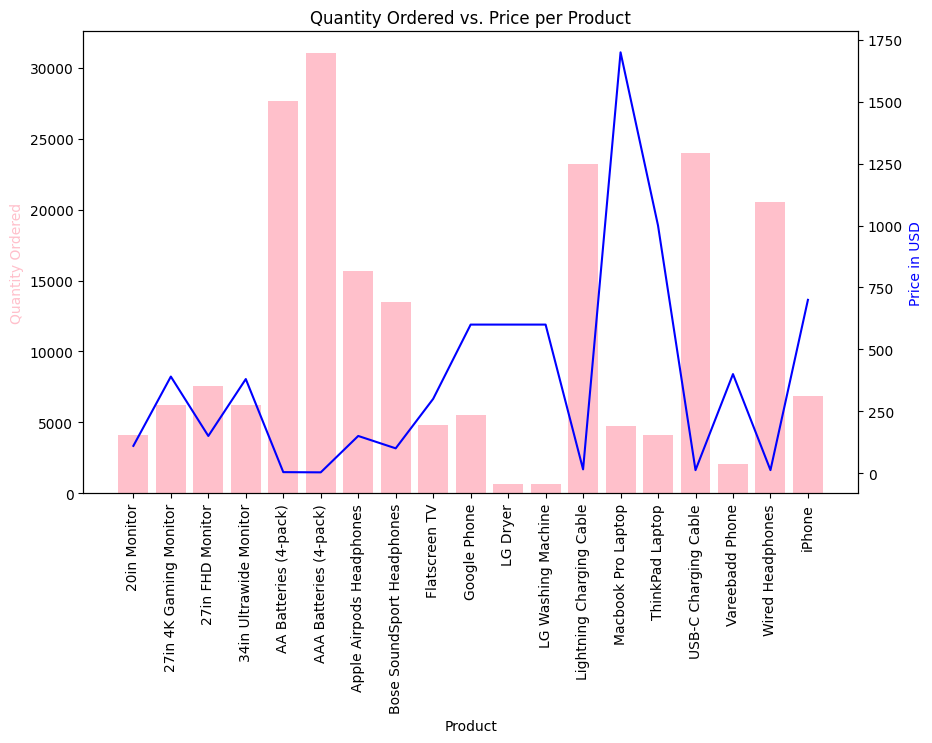

In [31]:
# 5. What product sold the most? Why do you think it sold the most?

# Sum only numeric columns (Quantity Ordered)
product_group = dataset.groupby('Product')['Quantity Ordered'].sum()

# List of product names for plotting
products = [product for product, df_product in dataset.groupby('Product')]

# Plot the total quantity ordered per product
plt.figure(figsize=(10, 6))
plt.bar(products, product_group, color='pink')
plt.title('Total Quantity Ordered per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation=90)
plt.show()

# Overlay prices to see if price correlates with quantity sold
prices = dataset.groupby('Product')['Price Each'].mean()

# Plot quantity ordered with price
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax1.bar(products, product_group, color='pink')
ax2.plot(products, prices, color='blue')

# Add titles and labels
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='pink')
ax2.set_ylabel('Price in USD', color='blue')
plt.title('Quantity Ordered vs. Price per Product')
ax1.set_xticklabels(products, rotation=90)

plt.show()


To analyze the correlation between numeric columns like Quantity Ordered, Price Each, and Sales, we can use a correlation matrix and visualize it with a heatmap.

Here's how you can implement the correlation analysis and the heatmap:
Select relevant numeric columns for the analysis.
Compute the correlation matrix using pandas.
Plot the correlation matrix using Seaborn for a heatmap visualization.
Code for Correlation Heatmap:

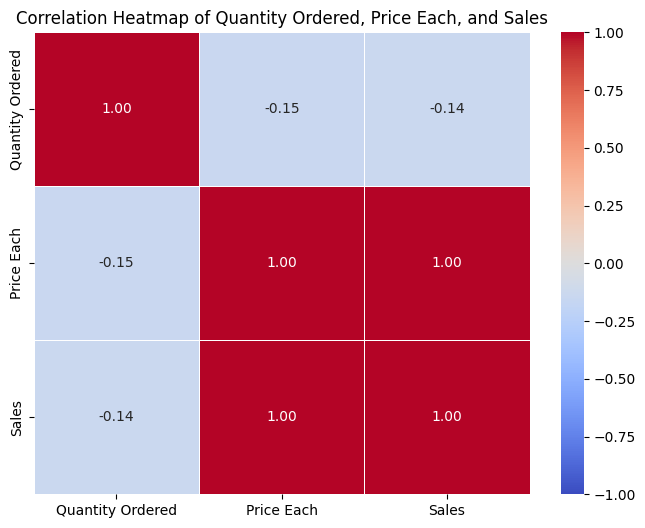

In [32]:
import seaborn as sns
import numpy as np

# Select relevant numeric columns for correlation analysis
numeric_columns = ['Quantity Ordered', 'Price Each', 'Sales']

# Compute the correlation matrix
correlation_matrix = dataset[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Quantity Ordered, Price Each, and Sales')
plt.show()


### Code to Calculate and Plot Monthly Sales Trends:

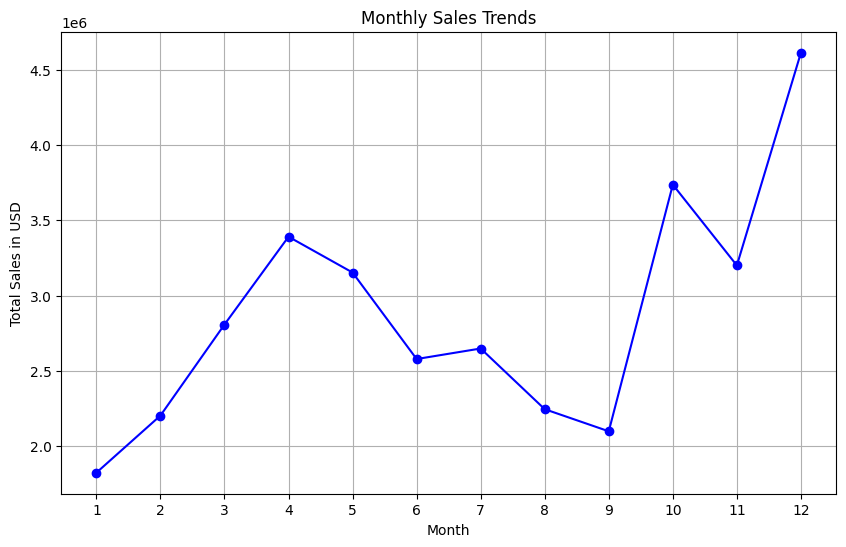

In [34]:
# Calculate the 'Sales' column if it doesn't exist
dataset['Sales'] = dataset['Quantity Ordered'] * dataset['Price Each']

# Ensure 'Order Date' is in datetime format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], errors='coerce')

# Extract the 'Month' from 'Order Date'
dataset['Month'] = dataset['Order Date'].dt.month

# Group by 'Month' and sum the 'Sales' column to get monthly sales
monthly_sales = dataset.groupby('Month')['Sales'].sum().reset_index()

# Plot the monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales in USD')
plt.grid(True)
plt.xticks(np.arange(1, 13, 1))  # Ensure all months (1-12) are displayed
plt.show()


#### In conclusion, the analysis of sales data revealed valuable insights into purchasing trends, product popularity, and sales correlations, providing a comprehensive understanding of consumer behavior and helping to identify key opportunities for business growth.